<a href="https://colab.research.google.com/github/vlad-danaila/machine-learning-workout/blob/master/Exercise_1_FCN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip3 install torch

In [0]:
import torch as t
import numpy as np
import sklearn as sk
import sklearn.datasets
import matplotlib.pyplot as plt
import math

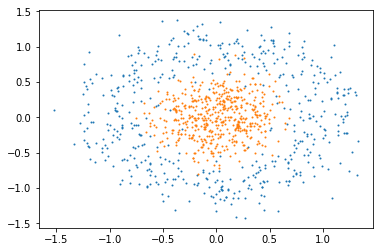

In [89]:
x_train, y_train = sk.datasets.make_circles(1000, noise = 0.2, factor=0.3)
plt.scatter(x_train[y_train == 0, 0], x_train[y_train == 0, 1], s = 1)
plt.scatter(x_train[y_train == 1, 0], x_train[y_train == 1, 1], s = 1)

In [0]:
class Classifier(t.nn.Module):
  
  def __init__(self, layers):
    super().__init__()
    self.layers = t.nn.ModuleList()
    for i in range(len(layers) - 1):
      self.layers.append(t.nn.Linear(layers[i], layers[i + 1]))

  def forward(self, x):
    for i in range(len(self.layers) - 1):
      x = t.nn.functional.relu(self.layers[i](x))
    return self.layers[-1](x)

In [0]:
class Data(t.utils.data.dataset.Dataset):
  def __init__(self, x, y):
    self.x = t.tensor(x, dtype=t.float32, device='cuda:0')
    self.y = t.tensor(y, dtype=t.float32, device='cuda:0')
  
  def __getitem__(self, i):
    return (self.x[i], self.y[i])
  
  def __len__(self):
    return len(self.y)

In [0]:
batch_size = 32

loader = t.utils.data.dataloader.DataLoader(Data(x_train, y_train), batch_size, shuffle = True)

In [0]:
epochs = 500

classifier = Classifier([2, 10, 1]).cuda()
optimizer = t.optim.Adam(classifier.parameters(), lr = 1e-3)
loss_fn = t.nn.BCEWithLogitsLoss()
losses = []

for i in range(epochs):
  print('Epoch', i)
  for (x, y) in loader:
    y_pred = classifier.forward(x)
    y_pred = t.squeeze(y_pred)
    loss = loss_fn(y_pred, y)
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()
    losses.append(loss.item())

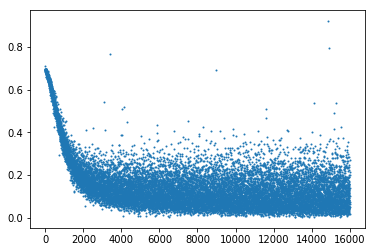

In [94]:
plt.scatter(range(len(losses)), losses, s = 1)

In [0]:
x0 = np.linspace(-1.5, 1.5, 1000)
x1 = np.linspace(-1.5, 1.5, 1000)
mesh_x0, mesh_x1 = np.meshgrid(x0, x1)
x01 = np.c_[mesh_x0.ravel(), mesh_x1.ravel()]
x01 = t.tensor(x01, dtype=t.float32).cuda()
with t.no_grad():
  pred = classifier.forward(x01)
pred = pred.view(1000, 1000)

In [0]:
def to_numpy(x):
  return x.cpu().detach().numpy()

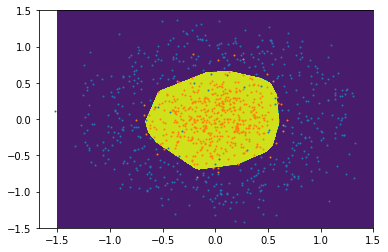

In [97]:
plt.contourf(x0, x1, to_numpy(pred) > 0.5)
plt.scatter(x_train[y_train == 0, 0], x_train[y_train == 0, 1], s = 1)
plt.scatter(x_train[y_train == 1, 0], x_train[y_train == 1, 1], s = 1)